Clustering: Lead Scoring: 

    
Reference: https://www.kaggle.com/code/ambarishdeb/lead-scoring-logistic-regression/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/gauravsharma/Documents/python/Dataset/lead scores.csv")

In [3]:
df.head()

,Unnamed: 0,LeadId,Converted,predicted,Score
0,4715,4715,0,0,16
1,7132,7132,1,1,59
2,8954,8954,0,1,86
3,5283,5283,0,0,20
4,3003,3003,0,0,25


In [4]:
df.tail()

,Unnamed: 0,LeadId,Converted,predicted,Score
6463,5734,5734,0,0,8
6464,5191,5191,0,0,8
6465,5390,5390,1,1,98
6466,860,860,0,0,13
6467,7270,7270,1,1,63


In [5]:
df.shape

(6468, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  6468 non-null   int64
 1   LeadId      6468 non-null   int64
 2   Converted   6468 non-null   int64
 3   predicted   6468 non-null   int64
 4   Score       6468 non-null   int64
dtypes: int64(5)
memory usage: 252.8 KB


In [7]:
df.describe()

,Unnamed: 0,LeadId,Converted,predicted,Score
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,4635.949289,4635.949289,0.384045,0.421923,38.397186
std,2657.028566,2657.028566,0.486406,0.493905,32.542294
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2339.750000,2339.750000,0.000000,0.000000,9.000000
50%,4646.500000,4646.500000,0.000000,0.000000,26.000000
75%,6941.250000,6941.250000,1.000000,1.000000,67.000000
max,9239.000000,9239.000000,1.000000,1.000000,100.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
LeadId        0
Converted     0
predicted     0
Score         0
dtype: int64

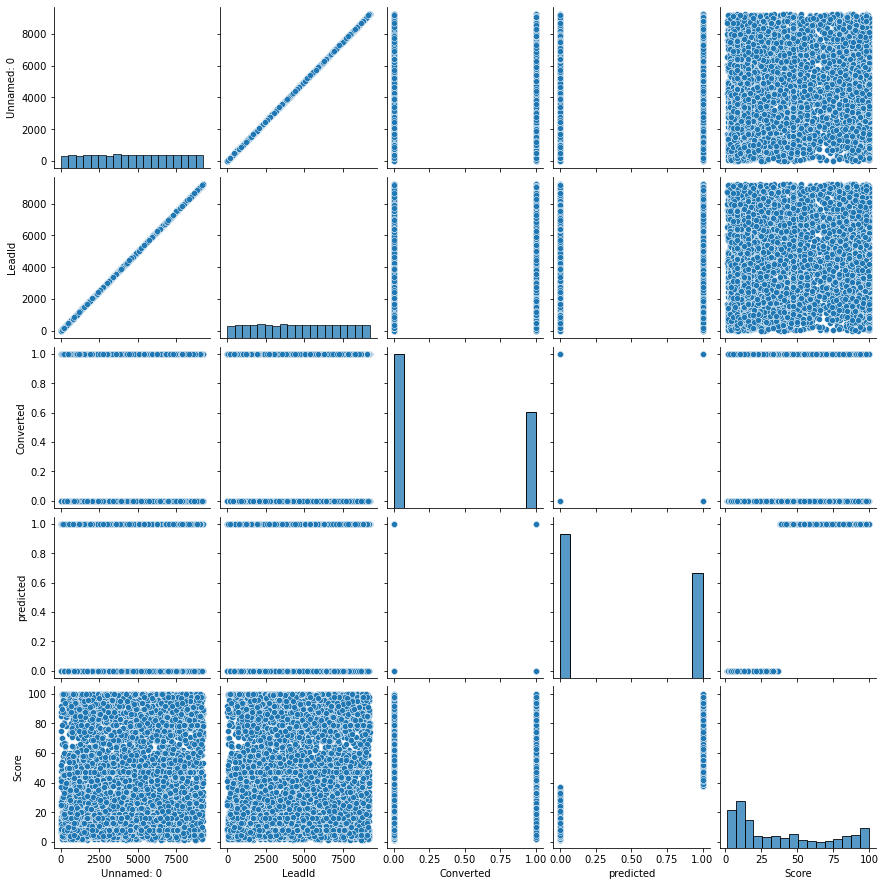

In [9]:
p = sns.pairplot(df)

In [10]:
# Assumptions for Linear Regression

# Linearity Linear regression needs the relationship between the independent and dependent variables to be linear. 
# Let's use a pair plot to check the relation of independent variables with the Score variable

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


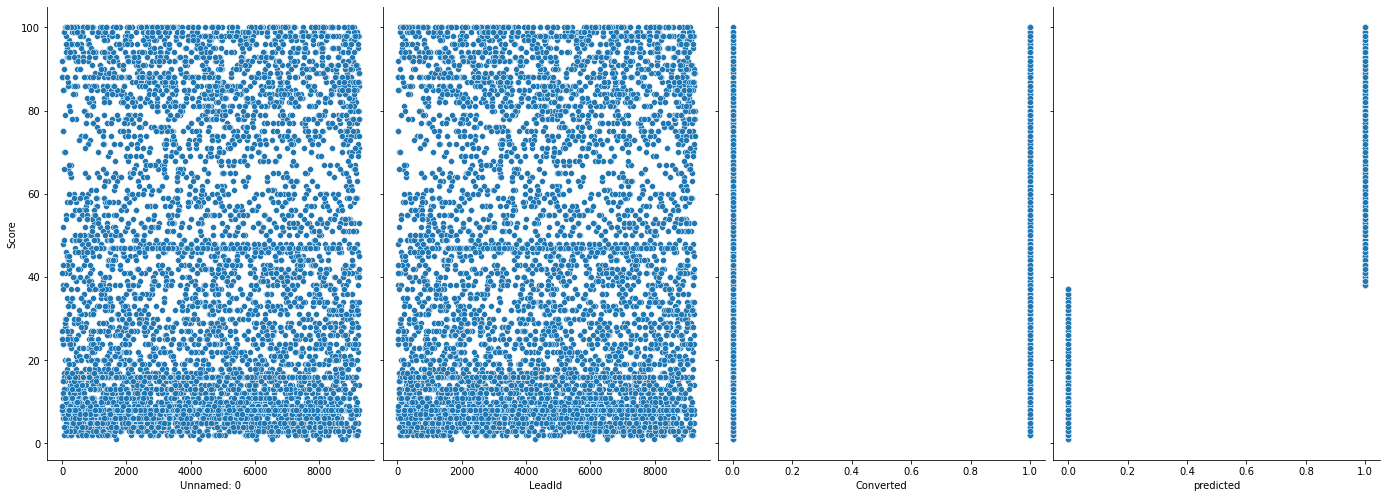

In [11]:
# visualize the relationship between the features and the score using scatterplots
p = sns.pairplot(df, x_vars=['Unnamed: 0','LeadId','Converted','predicted'], y_vars='Score', size=7, aspect=0.7)

In [12]:
# By looking at the plots we can see that with the Score variable the none of the independent variables form an accurately linear shape.
# None of the variables seem to hardly have any specific shape. 
# So it shows that a linear regression fitting might not be the best model for it. 
# A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

In [13]:
# Fitting the linear model
x = df.drop(["Score"],axis=1)
y = df.Score

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [17]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.8154152188521678


In [18]:
# Mean of Residuals Residuals as we know are the differences between the true value and the predicted value. 
# One of the assumptions of linear regression is that the mean of the residuals should be zero. 
# So let's find out.

In [19]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# Very close to zero so all good here.

Mean of Residuals -1.7811172267249676e-15


In [20]:
# Check for Homoscedasticity. Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. 
# By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms. 
# Detecting heteroscedasticity! Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values. 
# If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


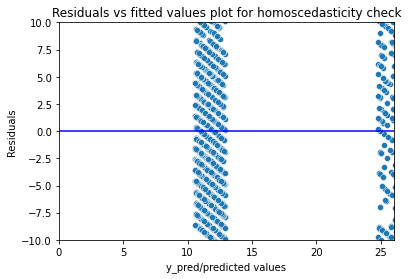

In [21]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [22]:
# Now we will be applying tests. 
# A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. 
# Remember, a researcher or data scientist would always aim to reject the null hypothesis.

In [23]:
# Goldfeld Quandt Test
# Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

# Null Hypothesis: Error terms are homoscedastic

# Alternative Hypothesis: Error terms are heteroscedastic.

In [24]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9792507077252254), ('p-value', 0.6970516809792455)]

In [25]:
# Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

# Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.

In [26]:
from scipy.stats import bartlett
test = bartlett(X_train[0],residuals)
print(test)

BartlettResult(statistic=10.340484123346705, pvalue=0.0013014387341219109)


In [27]:
from scipy.stats import bartlett
test = bartlett(X_train[1],residuals)
print(test)

BartlettResult(statistic=26.803765816891314, pvalue=2.2519806773612881e-07)


In [28]:
from scipy.stats import bartlett
test = bartlett(X_train[2],residuals)
print(test)

BartlettResult(statistic=13.116399428194859, pvalue=0.00029272206999036727)


In [29]:
# If p value is quite less than 0.05 in Bartlett, it's null hypothesis that error terms are homoscedastic gets rejected, that's not good for a regression.

In [30]:
# Check for Normality of error terms/residuals

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


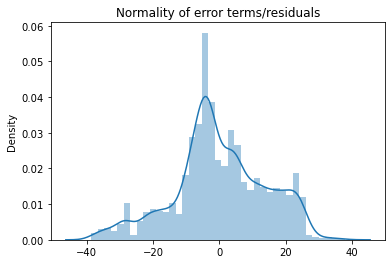

In [31]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


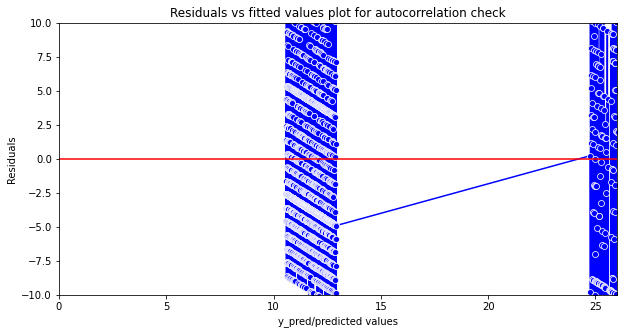

In [32]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [33]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])
#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.3271378302137859

In [34]:
import statsmodels.api as sm

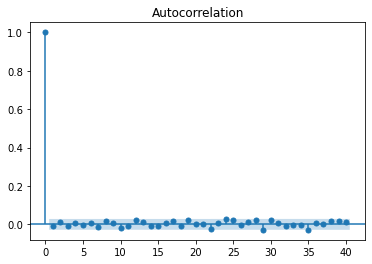

In [35]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

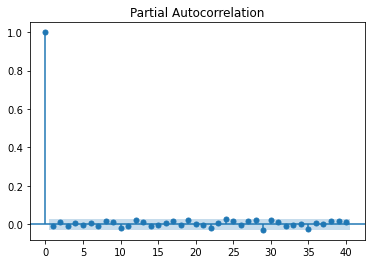

In [36]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

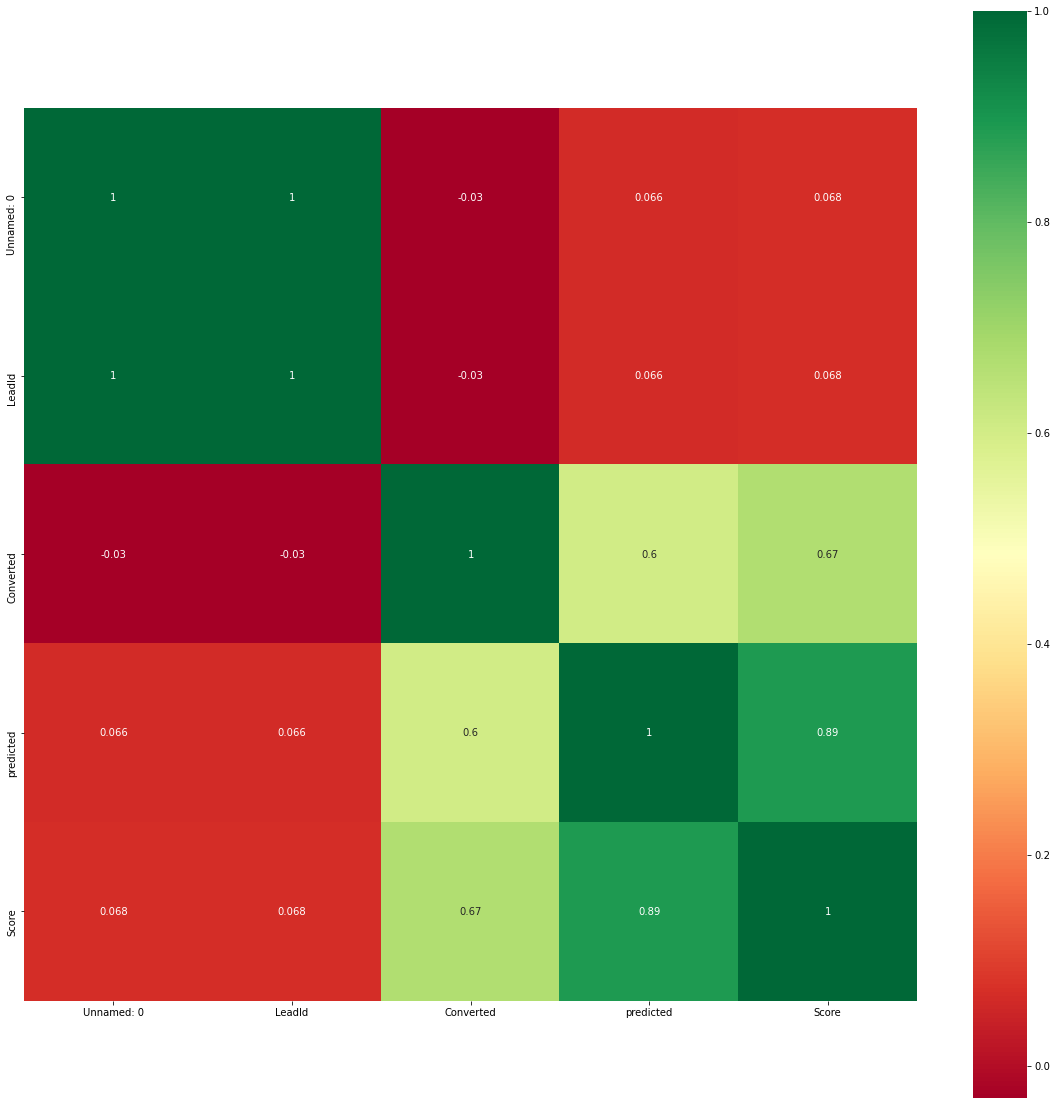

In [37]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [38]:
## Some other model evaluations

In [39]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [40]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9649173307980031
R squared: 0.9649173307980031


In [41]:
# SVM

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.8067673732497626
R squared: 0.8067673732497626
